# Packages 

In [2]:
using Random
using SparseArrays
using Plots

# Functions involved

In [2]:
"""
Functionality: compute the Manhattan distance between two points in R^2

### Imput:
    x - vector 1x2 containing the coordinated of one of the points;
    y - vector 1x2 containing the coordinated of the other point.
### Output:
    d - Manhattan distance between x and y
"""
function dist(x, y)
    d = abs(x[1] - y[1]) + abs(x[2] - y[2])
    return d
end

dist (generic function with 1 method)

In [4]:
"""
Functionality: generate weight and survival values for items according to a chosen distribution

### Imput:
    n - quantity of items;
    mean - mean of the normal distribution of the weight values;
    variance - variance of the normal distribution of the weight values;
    N - great number compared to n;
    mesc - mean of the scalars normal distribution;
    vesc - variance of the scalars normal distribution;
    wMin - value of the minimum weight value acceptable;
    wMax - value of the maximum weight value acceptable;
    sMin - value of the minimum scalar value acceptable;
    sMax - value of the maximum scalar value acceptable.
### Output:
    weight - vector nx1 containing the items weight values;
    surv - vector nx1 containing the items survival values.
"""
function ws(n, mean, variance, N, mesc, vesc, wMin, wMax, sMin, sMax)

    weight = (min.(wMax,max.(wMin,variance*randn(N).+mean)))

    weight = trunc.(weight)

    for i in 1:length(weight)
        if weight[i] <= 0
            splice!(weight,i)
        end

        if i + 1 > length(weight)
            break
        end
    end

    weight = weight[1:n]

    #scalars to determine survival values

    scalars = min.(sMax,max.(sMin,vesc*randn(n).+ mesc))

    surv = [weight[i]*scalars[i] for i in 1:n]

    surv = trunc.(surv)

    return weight, surv
    
end

ws (generic function with 1 method)

In [3]:
"""
Functionality: generate coordinates for items in a 50x50 square according to a chosen distribution

### Imput:
    n - quantity of items;
    med1 - mean of the normal distribution of the coordinates values;
    var1 - variance of the normal distribution of the coordinates values;
    N - great number compared to n;
    lMax - maximum value acceptable for a coordinate.
### Output:
    coord - vector nx1 containing the generated coordinates of each item;
    sparse(A) - image in dots of the generated coordenates and the origin (1,1).
"""
function map1(n, med1, var1, lMax, N)

    x = Int.(trunc.(min.(lMax,max.(1,var1*randn(N) .+ med1))))

    x = [1; x]

    y = Int.(trunc.(min.(lMax,max.(1,var1*randn(N) .+ med1))))

    y = [1; y]
    
    coord = [[x[i], y[i]] for i in 1:N]

    coord = collect(Set(coord))[1:(n+1)]

    coord[1] = [1, 1]

    x = [coord[i][1] for i in 1:(n+1)]

    y = [coord[i][2] for i in 1:(n+1)]

    A = zeros(50, 50)

    for c in coord
        A[c[1], c[2]] = 1
    end
    
    return coord, sparse(A)
    
end

map1 (generic function with 1 method)

In [6]:
"""
Functionality: generate coordinates for items in a 50x50 square in two clusters according to a chosen distribution

### Imput:
    n - quantity of items;
    a1 - mean of the normal distribution of the first coordinates values for the items of the first cluster;
    b1 - mean of the normal distribution of the second coordinates values for the items of the first cluster;
    var1 - variance of the normal distribution of the coordinates values for the first cluster;
    a2 - mean of the normal distribution of the first coordinates values for the items of the second cluster;
    b2 - mean of the normal distribution of the second coordinates values for the items of the second cluster;
    var2 - variance of the normal distribution of the coordinates values for the second cluster;
    lMax - maximum value acceptable for a coordinate.
### Output:
    coord - vector nx1 containing the generated coordinates of each item;
    sparse(A) - image in dots of the generated coordenates and the origin (1,1).
"""
function map2(n, a1, b1, var1, a2, b2, var2, lMax, N)

    # data for cluster 1

    x1 = Int.(trunc.(min.(lMax,max.(1,var1*randn(N) .+ a1))))

    x1 = [1; x1]

    y1 = Int.(trunc.(min.(lMax,max.(1,var1*randn(N) .+ b1))))

    y1 = [1; y1]

    coord1 = [[x1[i], y1[i]] for i in 1:N]

    coord1 = collect(Set(coord1))[1:(n+1)]

    coord1[1] = [1,1]

    # data for cluster 2

    x2 = Int.(trunc.(min.(lMax,max.(1,var2*randn(N) .+ a2))))

    y2 = Int.(trunc.(min.(lMax,max.(1,var2*randn(N) .+ b2))))

    coord2 = [[x2[i], y2[i]] for i in 1:N]

    coord2 = collect(Set(coord2))[1:n]

    coord = [coord1; coord2]

    x = [coord[i][1] for i in 1:(2n+1)]

    y = [coord[i][2] for i in 1:(2n+1)]

    A = zeros(50, 50)

    for c in coord
        A[c[1], c[2]] = 1
    end

    return coord, sparse(A)
    
end

map2 (generic function with 1 method)

In [7]:
"""
Functionality: generate the problem data (weight, surv and coord vectors) of a specified test

### Imput:
    myTest - constant that indicates the chosen test
### Output:
    weight - vector nx1 containing the items weight values;
    surv - vector nx1 containing the items survival values.
    coord - vector nx1 containing the generated coordinates of each item;
    sparse(A) - image in dots of the generated coordenates and the origin (1,1);
    capacity - capacity limit of the referred test;
    time - time limit of the referred test.
"""
function getTest(myTest)
    
    if myTest == :A1 || myTest == :A2 || myTest == :A3
        
        Random.seed!(84317309)
   
        weight, surv = ws(100, 15, 5, 300, 1, 0.4, 1, 30, 0.1, 3)
        
        Random.seed!(84317309)
   
        coord, sA = map1(100, 25, 8, 50, 5000) 
        
        if myTest == :A1
        
            capacity = 50
        
            time = 50
            
        elseif myTest == :A2
            
            capacity = 100
        
            time = 50
        
        elseif myTest == :A3
            
            capacity = 150
            
            time = 50
            
        end
                            
    elseif myTest == :B1 || myTest == :B2 || myTest == :B3
        
        Random.seed!(84317309)
   
        weight, surv = ws(100, 15, 5, 300, 1.5, 0.5, 1, 30, 0.1, 3)
        
        Random.seed!(84317309)
   
        coord, sA = map1(100, 25, 8, 50, 5000)
        
        if myTest == :B1
        
            capacity = 50
        
            time = 50
            
        elseif myTest == :B2
            
            capacity = 100
        
            time = 50
        
        elseif myTest == :B3
            
            capacity = 150
            
            time = 50
            
        end
        
    elseif myTest == :C1 || myTest == :C2 || myTest == :C3
        
        Random.seed!(84317309)
   
        weight, surv = ws(100, 15, 5, 300, 2.0, 0.5, 1, 30, 0.1, 3.5)
        
        Random.seed!(84317309)
   
        coord, sA = map1(100, 25, 8, 50, 5000)
        
        if myTest == :C1
        
            capacity = 50
        
            time = 50
            
        elseif myTest == :C2
            
            capacity = 100
        
            time = 50
        
        elseif myTest == :C3
            
            capacity = 150
            
            time = 50
            
        end
        
    elseif myTest == :D1 || myTest == :D2 || myTest == :D3
        
        Random.seed!(84317309)
   
        weight, surv = ws(100, 15, 5, 300, 1.5, 0.5, 1, 30, 0.1, 3)
        
        Random.seed!(84317309)
   
        coord, sA = map1(100, 25, 8, 50, 5000)
        
        if myTest == :D1
        
            capacity = 50
        
            time = 50
            
        elseif myTest == :D2
            
            capacity = 50
        
            time = 100
        
        elseif myTest == :D3
            
            capacity = 50
            
            time = 150
            
        end
        
    elseif myTest == :E1 || myTest == :E2 || myTest == :E3
        
        Random.seed!(84317309)
   
        weight, surv = ws(100, 15, 5, 300, 1.5, 0.5, 1, 30, 0.1, 3)
        
        Random.seed!(84317309)
   
        coord, sA = map1(100, 35, 8, 50, 5000)
        
        if myTest == :E1
        
            capacity = 50
        
            time = 50
            
        elseif myTest == :E2
            
            capacity = 50
        
            time = 100
        
        elseif myTest == :E3
            
            capacity = 50
            
            time = 150
            
        end
        
    elseif myTest == :F1 || myTest == :F2 || myTest == :F3
        
        Random.seed!(84317309)
   
        weight, surv = ws(100, 15, 5, 300, 1.5, 0.5, 1, 30, 0.1, 3)
        
        Random.seed!(84317309)
   
        coord, sA = map2(50, 20, 40, 7, 40, 20, 7, 50, 500)
        
        if myTest == :F1
        
            capacity = 50
        
            time = 50
            
        elseif myTest == :F2
            
            capacity = 50
        
            time = 100
        
        elseif myTest == :F3
            
            capacity = 50
            
            time = 150
            
        end
        
    end
    
    surv = [0; surv]

    weight = [0; weight]

    n = length(surv)

    Surv = zeros(n,n)

    for i in 1:n
        for j in 1:n
            Surv[i,j] = surv[j]
        end
    end


    V = Set([i for i in 1:n])

    r = 2 

    c = zeros(n,n)

    for i in 1:length(coord)
        for j in 1:length(coord)
            c[i,j] = dist(coord[i],coord[j])
        end
    end

    Weight = zeros(n,n)

    for i in 1:n
        for j in 1:n
            Weight[i,j] = weight[j]
        end
    end

    Const = [c, Weight]

    Limit = [time, capacity]

    Lambda = Array{Any,1}(undef, n)

    label_origin = zeros(n+r+2)

    label_origin[r+2+1] = 1

    label_origin[r+2] = 1

    for j in 1:n
        if c[1,j] > Limit[1] || weight[j] > Limit[2]
            label_origin[r+2+j] = Inf
        end
    end

    Lambda[1] = Set([label_origin])

    for i in 2:n
        Lambda[i] = Set([])
    end

    return V, Surv, Const, Limit, Lambda, n, r, coord
    
end

getTest (generic function with 1 method)

# Tests for items features

Varying weight and survival vectors and capacity in a uniform map

### Test A

### Test A.1

In [27]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:A1);

In [28]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

  0.759967 seconds (13.79 M allocations: 348.202 MiB, 6.39% gc time)


105-element Vector{Float64}:
  89.0
  49.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
   2.0
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

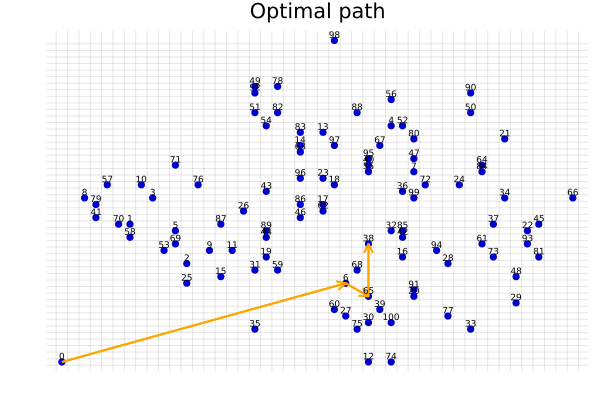

In [29]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\A1ESPPRC.png")

### Test A.2

In [30]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:A2);

In [31]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

 10.701162 seconds (162.40 M allocations: 3.732 GiB, 3.62% gc time)


105-element Vector{Float64}:
 150.0
  49.0
 100.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
   5.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

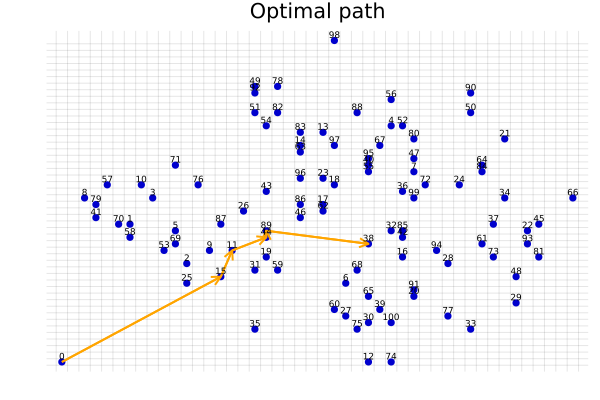

In [32]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\A2ESPPRC.png")

### Test A.3

In [33]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:A3);

In [34]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

 13.441770 seconds (195.85 M allocations: 4.479 GiB, 3.72% gc time)


105-element Vector{Float64}:
 183.0
  49.0
 148.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
   6.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

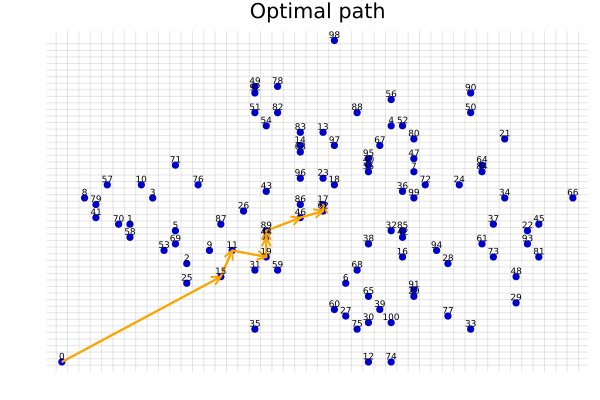

In [35]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\A3ESPPRC.png")

### Test B

### Test B.1

In [36]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:B1);

In [37]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

  0.792113 seconds (14.71 M allocations: 370.414 MiB, 5.36% gc time)


105-element Vector{Float64}:
 124.0
  49.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
   2.0
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

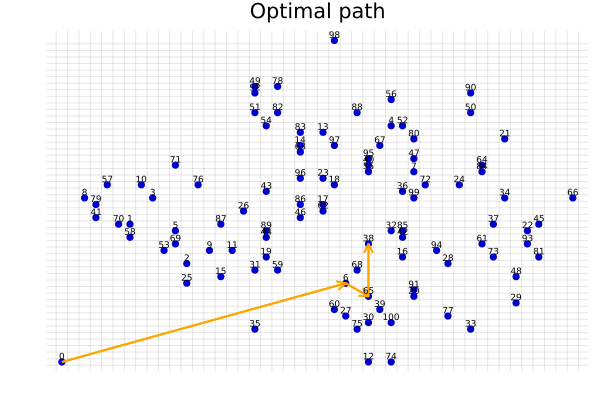

In [38]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\B1ESPPRC.png")

### Test B.2

In [39]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:B2);

In [40]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

 10.936609 seconds (162.55 M allocations: 3.745 GiB, 3.44% gc time)


105-element Vector{Float64}:
 213.0
  49.0
 100.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
   5.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

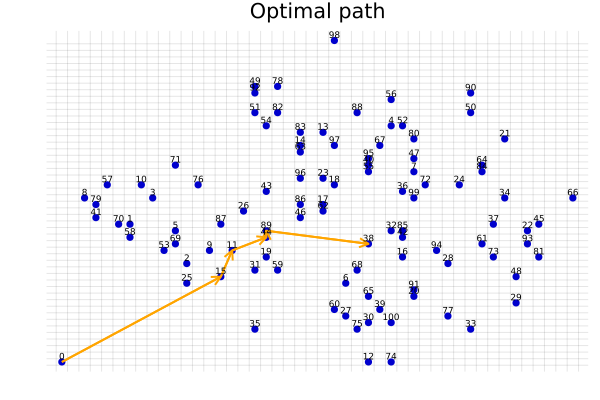

In [41]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\B2ESPPRC.png")

### Test B.3

In [42]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:B3);

In [43]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

 12.637146 seconds (196.55 M allocations: 4.502 GiB, 3.44% gc time)


105-element Vector{Float64}:
 265.0
  50.0
 145.0
 101.0
   1.0
  Inf
   2.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
  10.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

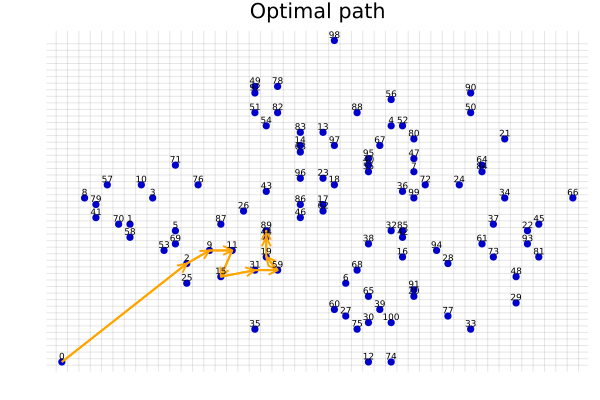

In [44]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\B3ESPPRC.png")

### Test C

### Test C.1

In [45]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:C1);

In [46]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

  0.822737 seconds (15.00 M allocations: 377.818 MiB, 5.21% gc time)


105-element Vector{Float64}:
 148.0
  49.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
   2.0
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

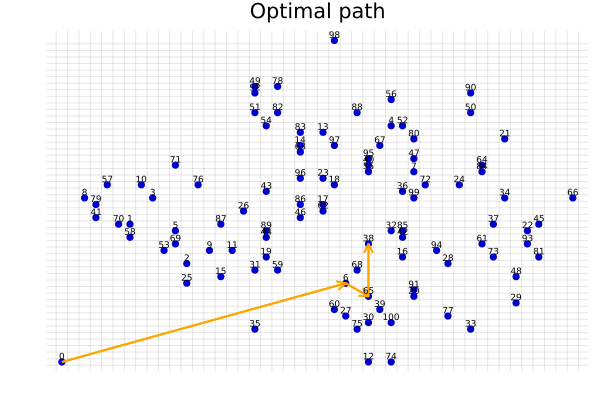

In [47]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\C1ESPPRC.png")

### Test C.2

In [48]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:C2);

In [49]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

 10.364468 seconds (164.91 M allocations: 3.791 GiB, 3.36% gc time)


105-element Vector{Float64}:
 264.0
  49.0
 100.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
   5.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

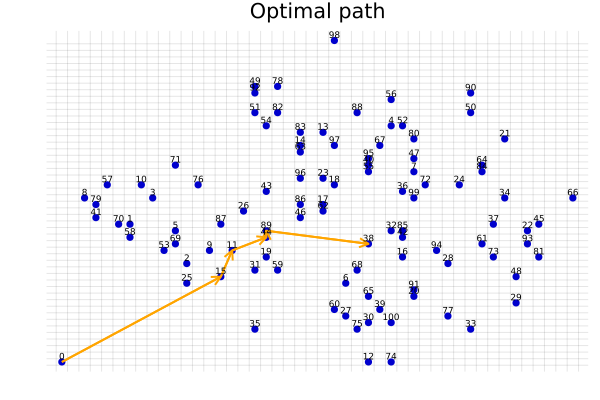

In [50]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\C2ESPPRC.png")

### Test C.3

In [51]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:C3);

In [52]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

 12.705278 seconds (199.89 M allocations: 4.578 GiB, 3.24% gc time)


105-element Vector{Float64}:
 340.0
  50.0
 148.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
   7.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

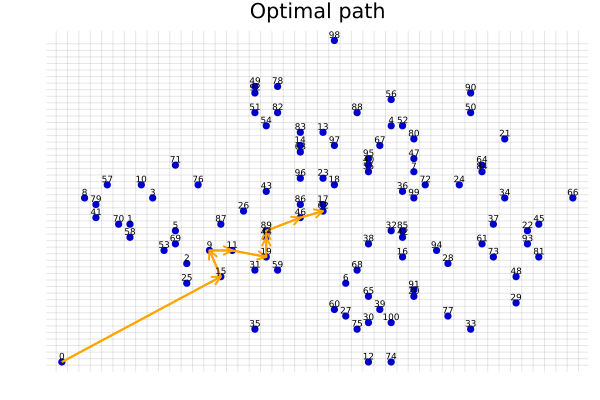

In [53]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\C3ESPPRC.png")

## Tests for map features

Varying map and time alongside a fixed uniform distribution of weight and survival value of the items

### Test D

### Test D.1

In [54]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:D1);

In [55]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

  0.777350 seconds (14.71 M allocations: 370.414 MiB, 4.67% gc time)


105-element Vector{Float64}:
 124.0
  49.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
   2.0
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

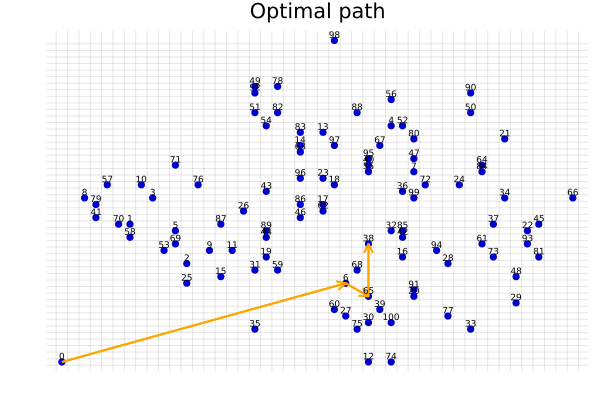

In [56]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\D1ESPPRC.png")

### Test D.2

In [57]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:D2);

In [58]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

146.229349 seconds (1.98 G allocations: 43.332 GiB, 3.75% gc time)


105-element Vector{Float64}:
 134.0
  92.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

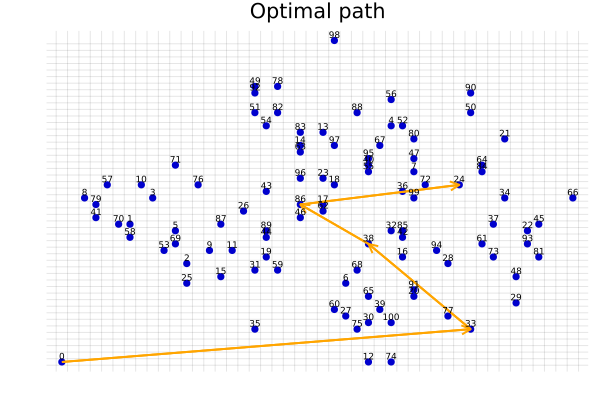

In [59]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\D2ESPPRC.png")

### Test D.3

In [15]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:D3);

In [ ]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

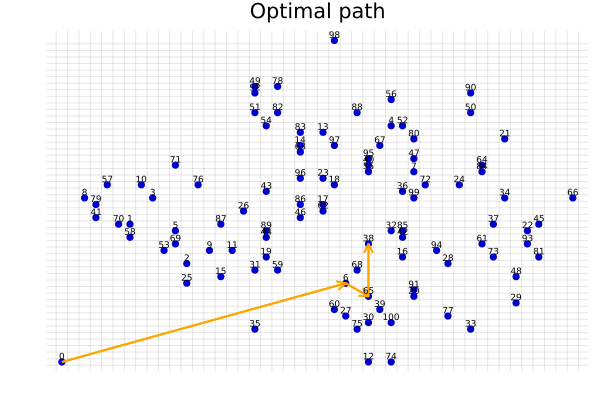

In [29]:
draw(coord, bests, 50, 50, 2)
#savefig("C:\\Users\\giova\\Downloads\\D3ESPPRC.png")

### Test E

### Test E.1

In [60]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:E1);

In [61]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

  0.016716 seconds (136.80 k allocations: 7.537 MiB, 54.49% gc time)


105-element Vector{Float64}:
  82.0
  49.0
  46.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   3.0
  Inf
  Inf
  Inf
  Inf

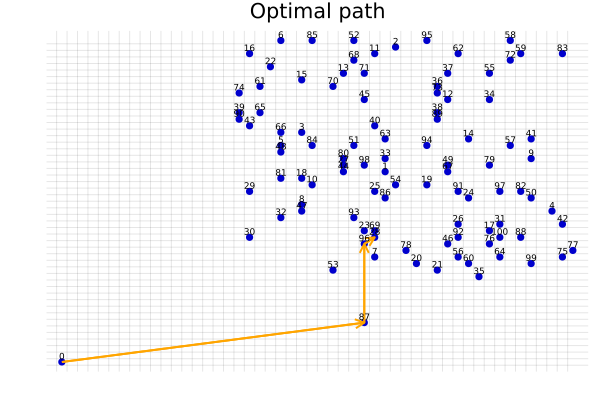

In [62]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\E1ESPPRC.png")

### Test E.2

In [63]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:E2);

In [64]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

109.969294 seconds (1.44 G allocations: 32.162 GiB, 3.48% gc time)


105-element Vector{Float64}:
 134.0
 100.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

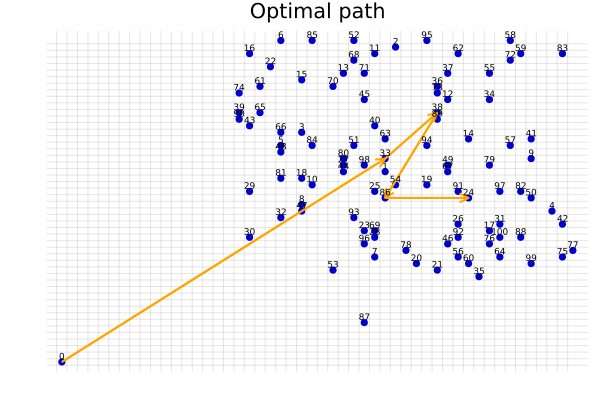

In [65]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\E2ESPPRC.png")

### Test E.3

In [72]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:E3);

In [ ]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

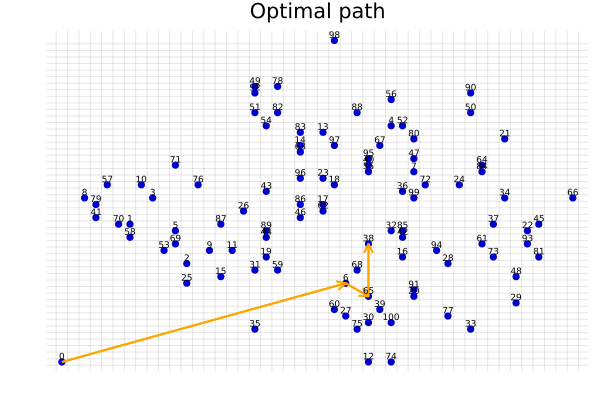

In [29]:
draw(coord, bests, 50, 50, 2)
#savefig("C:\\Users\\giova\\Downloads\\E3ESPPRC.png")

### Test F

### Test F.1

In [66]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:F1);

In [67]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

  0.030990 seconds (413.00 k allocations: 17.787 MiB, 25.17% gc time)


105-element Vector{Float64}:
  86.0
  50.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

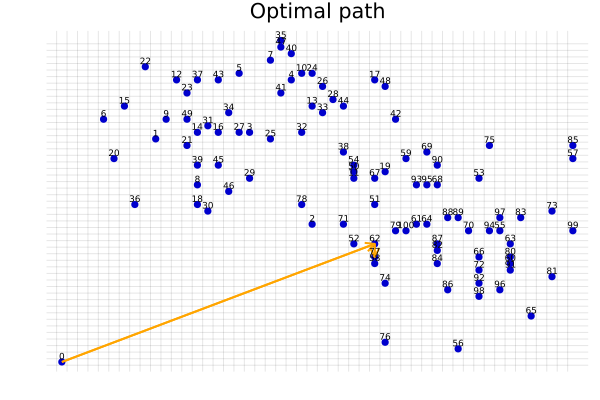

In [68]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\F1ESPPRC.png")

### Test F.2

In [69]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:F2);

In [70]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

 48.196380 seconds (824.22 M allocations: 18.231 GiB, 4.52% gc time)


105-element Vector{Float64}:
 134.0
  94.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

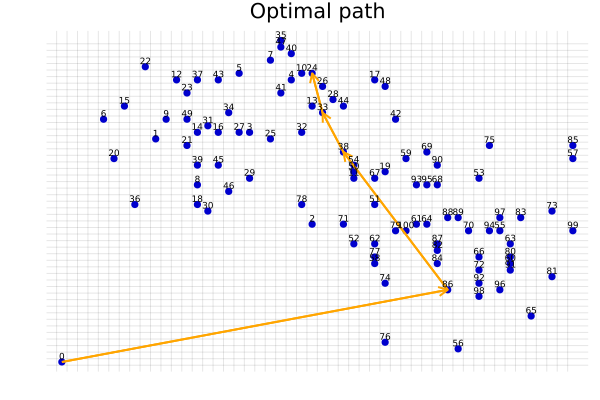

In [71]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\F2ESPPRC.png")

### Test F.3

In [23]:
V, Surv, Const, Limit, Lambda, n, r, coord = getTest(:F3);

In [24]:
@time bests = ESPPRC(V, Surv, Const, Limit, Lambda, n, r)[2]

1201.802878 seconds (10.28 G allocations: 230.099 GiB, 2.25% gc time, 0.00% compilation time)


105-element Vector{Float64}:
 134.0
 114.0
  50.0
 101.0
   1.0
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
   ⋮
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf
  Inf

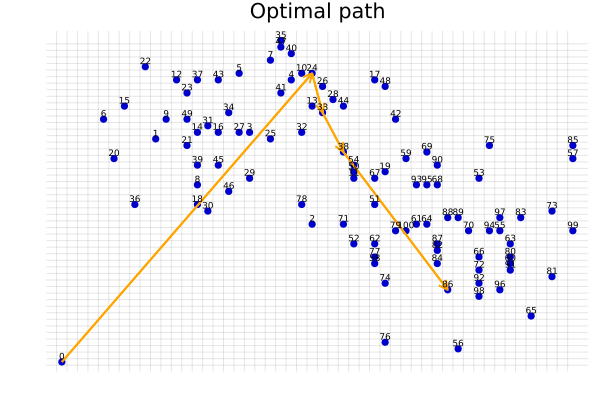

In [26]:
draw(coord, bests, 50, 50, 2)
savefig("C:\\Users\\giova\\Downloads\\F3ESPPRC.png")

# Algorithm

## ESPPRC

#### Extend()

In [8]:
"""
Functionality: extend a label from vertice i to vertice j (by certification in ESPPRC(), the extension will always be possible)

### Imput:
    lambda_i - matrix (2+r+n)x1 label to be extended from i;
    i - vertice that holds the current label;
    j - vertice that will receive a new label;
    T - matrix lx1 that constains the resources matrices;
    S - matrix nx1 that contains the survival value of each vertice;
    c - matrix nxndistance matrix;
    L - matrix nx1 that holds the upper limit of each resource.

### Output:
    lambda_j - matrix 1x(2+r+n)extended label.
"""
function Extend(lambda_i, i, j, S, T, L)
            
    viavel = true

    lambda_j =  copy(lambda_i)    
        
    lambda_j[1] = lambda_j[1] + S[i,j] # we add the objective function value and mark j as unreachable
    
    # uptading the order in which j was collected
    
    order = 1
    
    for k in lambda_j[(2+length(L)+1):end]
        if k > order && k != Inf
            order = k
            println
        end
    end
    
    lambda_j[2+length(L)+j] = order + 1
    
    for k in 1:length(L)
        lambda_j[k+1] = lambda_j[k+1] + T[k][i,j]
    end
    
    # uptading unreachable vertices from j now  
    
    for k in 1:n
        
        if lambda_j[2 + length(L) + k] == 0
            
            for g in 1:length(L)
                
                if (lambda_j[g+1] + T[g][j,k]) > L[g]
    
                    viavel = false
                    
                    break
                    
                end
                
            end
            
            if !viavel
                
                lambda_j[2 + length(L) + k] = Inf
                
            end

        end
        
        viavel = true
        
    end
    
    lambda_j[length(L)+2] = sum(1 for k in (length(L)+3):length(lambda_j) if lambda_j[k] > 0)   
        
    return lambda_j
end

Extend

#### EFF()

In [9]:
"""
Functionality: maintain the Lambda sets totally incomparable. Verifies which label can enter anda apply the domination rule to remove
labels from the set.

### Imput:
    Lambda - set of labels of a vertice;
    F - set of newly extended labels (that will possibly enter Lambda);
    bests - best objective function value (the entire label) obtained so far.

### Output:
    tmplambda - set Lambda possibly altered;
    changed - boolean that stores if Lambda was altered;
    bests - best objective function value (the entire label) obtained so far.
"""
function EFF(Lambda :: Set, F :: Set, bests)
        
    dominated = false
    
    changed = false
    
    tmplambda = copy(Lambda)
    
    if Lambda == Set([]) && F != Set([])
        
        changed = true 
        
        for l in F
            if l[1] > bests[1]
                bests = l
            end
        end
        
        return F, changed, bests
        
    else
        
        if F == Set([])
            
            changed = false
            
            return Lambda, changed, bests
            
        else
            
            for f in F
                for l in tmplambda 
                    
                    if l[1] >= f[1] && l != f
                        
                        dominated = true
                        
                        for k in 2:length(l)
                            
                            if l[k] > 0 && f[k] == 0
                                
                                dominated = false
                                
                                break
                                
                            end
                            
                        end
                        
                    end
                    
                    
                    if (l == f) || dominated
                        
                        break
                        
                    end
                    
                    
                end
                
                if !dominated && !(f in tmplambda)
                    
                    changed = true
                                        
                    for l in tmplambda
                        
                        if f[1] >= l[1] 
                            
                            dominated = true 
                            
                            for k in 2:length(l)
                                
                                if f[k] > 0 && l[k] == 0
                                    
                                    dominated = false
                                    
                                    break
                                    
                                end
                                
                            end
                            
                            if dominated
                            
                                tmplambda = setdiff(tmplambda, Set([l]))
                                
                            end
                            
                        end
                        
                    end
                    
                    tmplambda = union!(tmplambda, Set([f]))
                                        
                    if f[1] > bests[1]
                        
                        bests = f
                    
                    end
                    
                end
                
                dominated = false
            
            end
            
        end
        
    end
    
    return tmplambda, changed, bests
    
end

EFF

#### ESPPRC()

In [10]:
"""
Functionality: applies the label correcting algorithm on a totally connected graph for the ESPPRC.

### Imput:
    V - set of vertices of the graph;
    S - matrix nxn where each entry represents the objective value gained by traveling along each edge of the graph;
    T - matrix lx1 containig each resource matrix of the graph;
    L - matrix lx1 containing the upper limit for each resource;
    Lambda - matrix nx1 where each entry is the set of labels of the corresponding vertex;
    n - number of vertices of the graph;
    r - number of resources of the problem.

### Output:
    Lambda - matrix nx1 where each entry is the set of labels of the corresponding vertex;
    bests - optimal objective function value (the entire label)

"""
function ESPPRC(V, S, T, L, Lambda, n, r)
    
    bests = zeros(2+r+n)
    
    i = 1
    
    j = 1
    
    E = zeros(n)

    E[1] = 1

    F = Set([])
    
    changed = false
    
    while sum(E) != 0
        
        if E[i] != 0
                
            for k in 0:(n-2) 
                
                
                j = (i+k) % n + 1  
                                
                for l in Lambda[i]

                    if l[2+r+j] == 0 
                        
                        F = union(F, Set([Extend(l, i, j, S, T, L)])) 
                        
                    end
                    
                end
                
                Lambda[j], changed, bests = EFF(Lambda[j], F, bests)

                F = Set([])

                if changed
                    
                    E[j] = 1
                    
                end
                
            end
            
            E[i] = 0
            
        end
        
        i = i % n + 1
        
    end

    return Lambda, bests

end

ESPPRC

#### draw()

In [11]:
"""
Functionality: draws the optimal path that collects all items from the optimal solution

#### Input:
    coord - coordinates of the items in the problem
    label - optimal label, containing th optimal path
    dimx, dimy - dimensions of the map in the x and y axis respectively
    r - number of resources in the problem

#### Output:
    Returns an image that contains the optimal path and all the items displayed in a cartesian plane.

"""
function draw(coord, label, dimx, dimy, r)
    
    n = length(coord)
    
    x = []

    for i in 1:length(coord)
        append!(x,coord[i][1])
    end

    y = []

    for i in 1:length(coord)
        append!(y,coord[i][2])
    end
    
    # drawing the items

    sct = scatter(x,y, title = "Optimal path", label = "", color = :blue3
        , gridcolor=:black, gridwidth=1, gridalpha =0.1
        , m = (:circle, 4, stroke(0)))
    
    annotate!(x, y.+0.1, text.(0:(length(x)-1), :bottom, 6))
    
    # drawing the map and the arrows
    
     plot!(sct 
    , xticks = ([-0.5:1:(dimx-0.5);])
    , x_foreground_color_text = :white
    , yticks = ([-0.5:1:(dimy-0.5);])
    , y_foreground_color_text = :white
    , axis = false)
    
    for i in 1:n 
        for j in 1:n 
            if (label[2+r+i] == label[2+r+j] - 1) && label[2+r+i] != Inf && label[2+r+j] != Inf
                plot!([coord[i][1], coord[j][1]], [coord[i][2], coord[j][2]]
                , color = :orange, arrow = :arrow, lw = 2, label = "")
            end
        end
    end
    
    display(sct)
    
end

draw

### Problem data (compilation)

In [12]:
Ss = [0; 10; 25; 5; 15; 12; 10]

Sobrev = zeros(7,7)

n = 7

for i in 1:n
    for j in 1:n
        Sobrev[i,j] = Ss[j]
    end
end

Pp = [0; 3; 10; 3; 5; 5; 4]

V = Set([i for i in 1:n])

r = 2 

function dist(x, y)
    d = abs(x[1] - y[1]) + abs(x[2] - y[2])
    return d
end


coord = [[0,0], [4,1], [14,12], [10,10], [3,4], [5,6], [14,13]]

c = zeros(n,n)

for i in 1:length(coord)
    for j in 1:length(coord)
        c[i,j] = dist(coord[i],coord[j])
    end
end

Weight = zeros(n,n)

for i in 1:n
    for j in 1:n
        Weight[i,j] = Pp[j]
    end
end

display(Weight)


T = [c, Weight]

L = [30, 30]

Lambda = Array{Any,1}(undef, n)

label_origin = zeros(n+r+2)

label_origin[r+2+1] = 1

label_origin[r+2] = 1

for j in 1:n
    if c[1,j] > L[1] || Pp[j] > L[2]
        label_origin[r+2+j] = Inf
    end
end


Lambda[1] = Set([label_origin])

for i in 2:n
    Lambda[i] = Set([])
end


lambda_j = 0


@time bests = ESPPRC(V, Sobrev, T, L, Lambda, n, r)[2]
#solution: best survival value obtained = 77 collecting the items 3, 10, 16, 8, 4 and 17 in this order

7×7 Matrix{Float64}:
 0.0  3.0  10.0  3.0  5.0  5.0  4.0
 0.0  3.0  10.0  3.0  5.0  5.0  4.0
 0.0  3.0  10.0  3.0  5.0  5.0  4.0
 0.0  3.0  10.0  3.0  5.0  5.0  4.0
 0.0  3.0  10.0  3.0  5.0  5.0  4.0
 0.0  3.0  10.0  3.0  5.0  5.0  4.0
 0.0  3.0  10.0  3.0  5.0  5.0  4.0

  1.285451 seconds (1.21 M allocations: 65.462 MiB, 1.59% gc time, 99.88% compilation time)


11-element Vector{Float64}:
 77.0
 30.0
 30.0
  7.0
  1.0
  2.0
  7.0
  5.0
  3.0
  4.0
  6.0

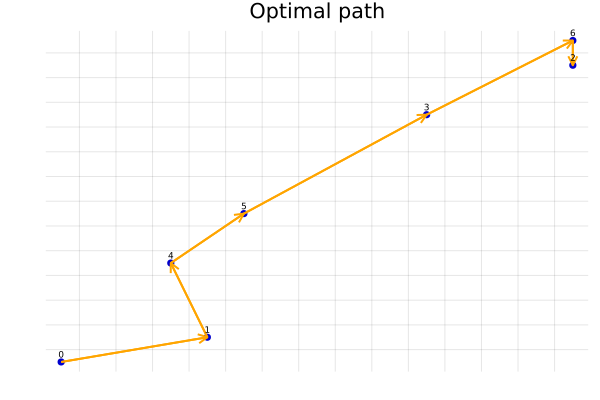

In [13]:
draw(coord, bests, 15, 15, 2)
#savefig("C:\\Users\\giova\\Downloads\\plot.png")